In [25]:
import pandas as pd
import seaborn as sns

In [26]:
df = pd.read_csv('median_data.csv')

In [27]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

<Axes: xlabel='overall_rating', ylabel='Count'>

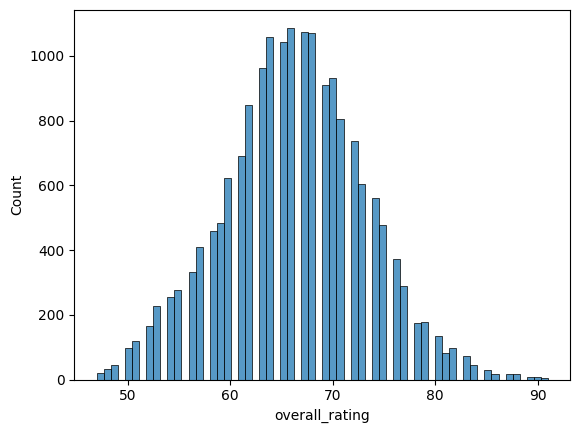

In [28]:
sns.histplot(df['overall_rating'])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [30]:
def evaluate_model(y_train, y_train_pred, y_test, y_pred):
    print('Train Set:')
    print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
    print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
    print(f'R2: {r2_score(y_train, y_train_pred)}')

    print()

    print('Test Set:')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')

# Linear Regression

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [32]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.241597908854705
MAE: 1.3957993791835461
R2: 0.9332108172033957

Test Set:
MSE: 3.322241837592516
MAE: 1.4153944654802126
R2: 0.9305976827983435


In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.241597908854705
MAE: 1.3957993791835461
R2: 0.9332108172033957

Test Set:
MSE: 3.322241837592516
MAE: 1.4153944654802126
R2: 0.9305976827983435


In [34]:
# Định nghĩa số lượng folds cho cross-validation
cv = 10

# Sử dụng cross_val_score để tính toán R^2 score
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

# Sử dụng cross_val_score để tính toán MSE (sử dụng scoring 'neg_mean_squared_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# Chuyển đổi MSE về giá trị dương
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

# Đánh giá Mean Absolute Error (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 10-fold cross-validation: [ 0.80355451  0.1482272   0.54264987 -0.44073829 -2.34222093 -4.63274594
 -4.65225506 -3.6643521  -1.59623725  0.69433501]
R^2 trung bình: -1.514 ± 2.080

MSE cho 10-fold cross-validation: [3.12486448 2.88326134 7.98081758 4.84763981 3.27758753 2.88681409
 2.69669417 2.92005697 2.74406882 3.59733396]
MSE trung bình: 3.696± 1.550

MAE cho 10-fold cross-validation: [1.35474741 1.32673913 2.2241538  1.71566258 1.41955293 1.34863352
 1.30875219 1.34960652 1.3143667  1.42358785]
MAE trung bình: 1.479 ± 0.273


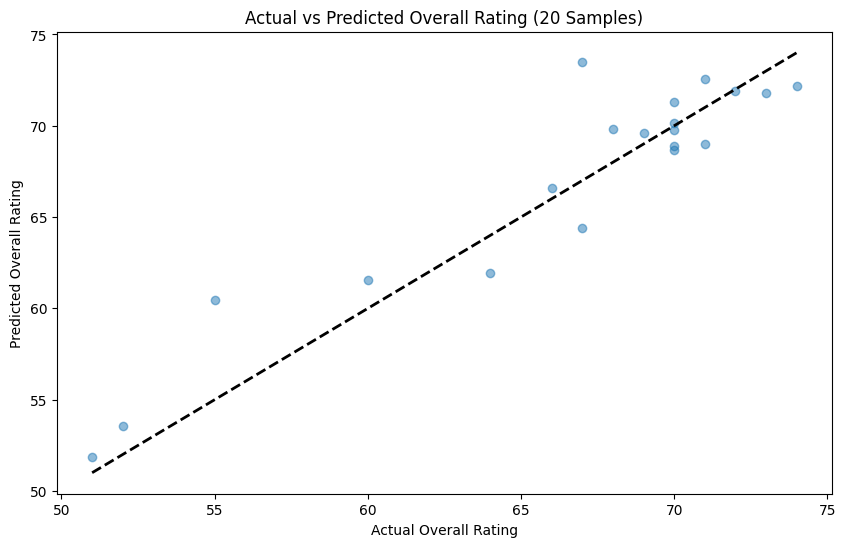

In [35]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:20]
y_pred_sample = y_pred[:20]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (20 Samples)')
plt.show()

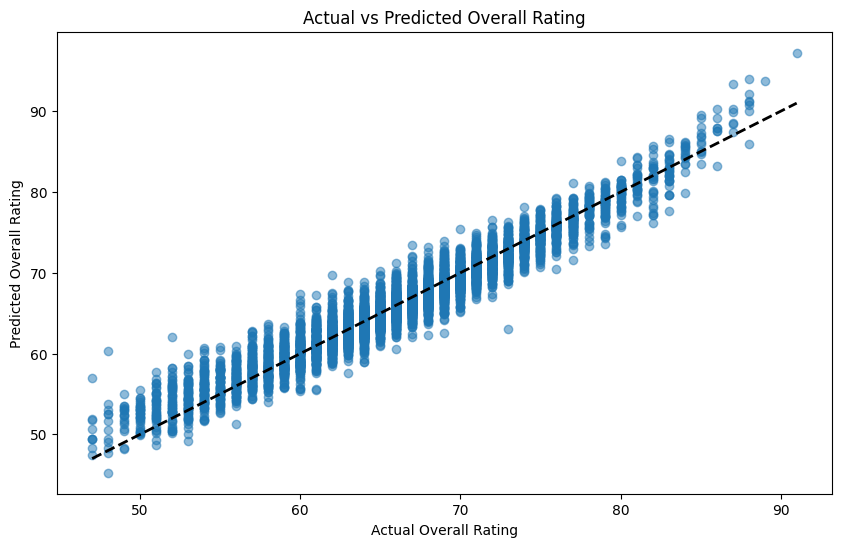

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating')
plt.show()

In [42]:
model = LinearRegression()

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print('Cross Validation Mean Squared Error:', -scores.mean())

Cross Validation Mean Squared Error: 3.695913874127463


In [47]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')
print('Leave-One-Out Mean Squared Error:', -scores.mean())

Leave-One-Out Mean Squared Error: 3.2860683959775785


In [51]:
scores[:25]

array([-18.81480773, -18.97088256,  -3.30322091, -10.85482375,
       -25.04135066, -38.96046732, -15.96778121,  -0.20586818,
       -23.66564564,  -0.33666898,  -6.37275595, -26.34108903,
       -66.94007457, -21.19321591,  -0.34677261, -41.45513378,
        -1.21079892,  -4.9670494 ,  -1.45878692,  -8.81828979,
       -10.50576809,  -0.55036604,  -2.13799164,  -8.64546368,
       -11.57048764])